In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st

In [2]:
y   = load('../../March2021/Observation_models/ObsY.joblib') 
CNN = load('../../March2021/Observation_models/CNNY.joblib') 
LR  = load('../../March2021/Observation_models/LRY.joblib')
SVR  = load('../../March2021/Observation_models/SVRY.joblib')

ACCESS_CM2_CNN = load('ACCESS-CM2-CNN-Y1.joblib')


CanESM5_CNN = load('CanESM5-CNN-Y.joblib')


IITMESM_CNN = load('IITM-ESM-CNN-Y1.joblib')


INM_CM4_8_CNN = load('INM-CM4-8-CNN-Y.joblib')


INM_CM5_0_CNN = load('INM-CM5-0-CNN-Y.joblib')


IPSL_CM6A_LR_CNN = load('IPSL-CM6A-LR-CNN-Y1.joblib')


MIROC6_CNN = load('MIROC6-CNN-Y.joblib')


MRI_ESM2_0_CNN = load('MRI-ESM2-0-CNN-Y.joblib')


MPI_ESM1_2_LR_CNN = load('MPI-ESM1-2-LR-CNN-Y1.joblib')


MPI_ESM1_2_HR_CNN = load('MPI-ESM1-2-HR-CNN-Y.joblib')


EC_Earth3_CNN = load('EC-Earth3-CNN-Y1.joblib')



In [3]:
def getFogTS( dArray ):
   #"This function gives TS of  for each season e.g. if year
   #  is 1981 then it will contain values between 1dec1980 to 31jan1981"
    fg=list()
    
    for yr in range(1981,2015,1):
        dStart=datetime.datetime(yr-1, 12, 1)
        dEnd=datetime.datetime(yr, 1, 31)
        ySMean = dArray.sel(time=slice(dStart,dEnd)).mean(dim='time').values.tolist()
        #print(yAct)
        fg.append(ySMean)
        
    
    return fg

In [4]:
fO=getFogTS(y)
ObsMean=st.mean(fO)
print(ObsMean)
ObsStd=st.stdev(fO)
print(ObsStd)

0.2832827324478178
0.11073566489111651


In [5]:
pow(4, 2)

16

In [6]:
RE=list()
IVS=list()
REIVS=list()
fList=(y,LR,SVR,CNN,ACCESS_CM2_CNN,CanESM5_CNN,IITMESM_CNN,INM_CM4_8_CNN,INM_CM5_0_CNN ,IPSL_CM6A_LR_CNN,
       MIROC6_CNN,MRI_ESM2_0_CNN, MPI_ESM1_2_LR_CNN, MPI_ESM1_2_HR_CNN,EC_Earth3_CNN)
fListNames=('y','LR','SVR','CNN','ACCESS_CM2_CNN','CanESM5_CNN','IITMESM_CNN','INM_CM4_8_CNN','INM_CM5_0_CNN' ,'IPSL_CM6A_LR_CNN',
            'MIROC6_CNN','MRI_ESM2_0_CNN', 'MPI_ESM1_2_LR_CNN', 'MPI_ESM1_2_HR_CNN','EC_Earth3_CNN')
for fL,fn in zip(fList,fListNames) :
    ts=getFogTS(fL)
    re1=((st.mean(ts)-ObsMean)/ObsMean)*100.0
    RE.append(re1)
    stdCal=((st.stdev(ts)/ObsStd)-(ObsStd/st.stdev(ts)))
    ivs1=pow(stdCal,2)
    IVS.append(ivs1)
    REIVS.append([fn,re1,ivs1])
    
    
print(RE)    
print(IVS)

df = pd.DataFrame (REIVS,columns=['Name','RE','IVS'])
print (df)

    


[0.0, 2.899718268806138, -1.4525278365297047, 1.5104495761974048, 2.144765767243704, -4.96134382596937, -3.2205137780318047, -3.801534517274971, -3.8634049789817104, 1.15340683938382, 1.2974368680688506, 3.632839407450683, 1.6209241891388095, -0.012794816930756842, 2.640143699504339]
[0.0, 0.634131379049697, 0.68288298827451, 0.0002646566658969368, 0.4182127097396612, 0.7114442743721204, 1.1044157174653284, 1.5703174991636382, 3.40426138520718, 0.41755004666969103, 1.3162150999601676, 1.2977727417063916, 0.2759193044987833, 0.6753839472173658, 0.0071751639248429965]
                 Name        RE       IVS
0                   y  0.000000  0.000000
1                  LR  2.899718  0.634131
2                 SVR -1.452528  0.682883
3                 CNN  1.510450  0.000265
4      ACCESS_CM2_CNN  2.144766  0.418213
5         CanESM5_CNN -4.961344  0.711444
6         IITMESM_CNN -3.220514  1.104416
7       INM_CM4_8_CNN -3.801535  1.570317
8       INM_CM5_0_CNN -3.863405  3.404261
9    IP

In [7]:
RE=list()
IVS=list()
fList=(y,LR,SVR,CNN,ACCESS_CM2_CNN,CanESM5_CNN,IITMESM_CNN,INM_CM4_8_CNN,INM_CM5_0_CNN ,IPSL_CM6A_LR_CNN,
       MIROC6_CNN,MRI_ESM2_0_CNN, MPI_ESM1_2_LR_CNN, MPI_ESM1_2_HR_CNN,EC_Earth3_CNN)
for fL in fList :
    ts=getFogTS(fL)
    re1=((st.mean(ts)-ObsMean)/ObsMean)*100.0
    RE.append(re1)
    stdCal=((st.stdev(ts)/ObsStd)-(ObsStd/st.stdev(ts)))
    ivs1=pow(stdCal,2)
    IVS.append(ivs1)
    
print(RE)    
print(IVS)

[0.0, 2.899718268806138, -1.4525278365297047, 1.5104495761974048, 2.144765767243704, -4.96134382596937, -3.2205137780318047, -3.801534517274971, -3.8634049789817104, 1.15340683938382, 1.2974368680688506, 3.632839407450683, 1.6209241891388095, -0.012794816930756842, 2.640143699504339]
[0.0, 0.634131379049697, 0.68288298827451, 0.0002646566658969368, 0.4182127097396612, 0.7114442743721204, 1.1044157174653284, 1.5703174991636382, 3.40426138520718, 0.41755004666969103, 1.3162150999601676, 1.2977727417063916, 0.2759193044987833, 0.6753839472173658, 0.0071751639248429965]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0.0, 2.144765767243704, -4.96134382596937, -3.2205137780318047, -3.801534517274971, -3.8634049789817104, 1.15340683938382, 1.2974368680688506, 3.632839407450683, 1.6209241891388095, -0.012794816930756842, 2.640143699504339]
[0.0, 0.4182127097396612, 0.7114442743721204, 1.1044157174653284, 1.5703174991636382, 3.40426138520718, 0.41755004666969103, 1.3162150999601676, 1.2977727417063916, 0.2759193044987833, 0.6753839472173658, 0.0071751639248429965]


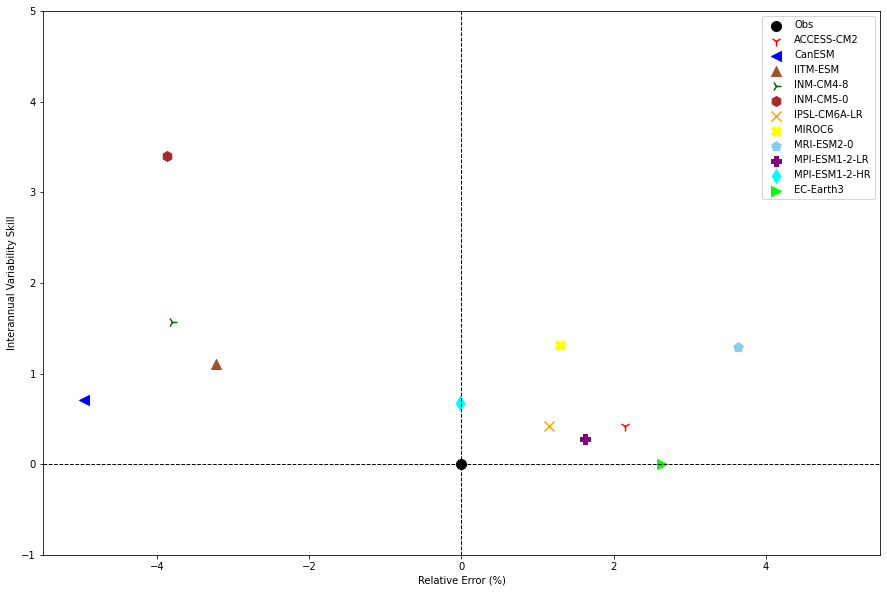

In [16]:

import matplotlib.patches as mpatches


RE=list()
IVS=list()
fList=(y,ACCESS_CM2_CNN,CanESM5_CNN,IITMESM_CNN,INM_CM4_8_CNN,INM_CM5_0_CNN ,IPSL_CM6A_LR_CNN,
       MIROC6_CNN,MRI_ESM2_0_CNN, MPI_ESM1_2_LR_CNN, MPI_ESM1_2_HR_CNN,EC_Earth3_CNN)
for fL in fList :
    ts=getFogTS(fL)
    re1=((st.mean(ts)-ObsMean)/ObsMean)*100.0
    RE.append(re1)
    stdCal=((st.stdev(ts)/ObsStd)-(ObsStd/st.stdev(ts)))
    ivs1=pow(stdCal,2)
    IVS.append(ivs1)
    
print(RE)    
print(IVS)

classes = ['Obs','ACCESS-CM2','CanESM','IITM-ESM','INM-CM4-8','INM-CM5-0','IPSL-CM6A-LR',
           'MIROC6','MRI-ESM2-0','MPI-ESM1-2-LR','MPI-ESM1-2-HR','EC-Earth3']
#class_colours = ['black','red','navy','blue','lightcoral','chocolate','yellow','green','lime','magenta','aqua','plum','tan','brown','grey']
class_colours = ['black','black','black','black','black','black','black',
                 'black','black','black','black','black','black','black','black']
markers=['o','1','<','^','4','h','x','X','p','P','d','>']
rangs=['black','red','blue','sienna','darkgreen','brown','orange',
                 'yellow','skyblue','purple','aqua','lime']

figure, axes = plt.subplots(figsize=(15,10))


for r,i,m,c,ra in zip(RE,IVS,markers,classes,rangs):
    plt.scatter(r, i,c=ra,  marker=m, label=c,s=100)
plt.ylim(top=5) #ymax is your value
plt.ylim(bottom=-1) #ymin is your value
plt.xlim(right=5.5) #xmax is your value
plt.xlim(left=-5.5) #xmin is your value
plt.xlabel('Relative Error (%)')
plt.ylabel('Interannual Variability Skill')
plt.legend()
x1, y1 = [RE[0], RE[0]], [-1, 5]
x2, y2 = [-5.5, 5.5], [IVS[0], IVS[0]]
plt.plot(x1, y1,'--',  x2, y2,'--', linewidth=1,color='black',fillstyle='none')
#c=plt.Circle(( fMean[0] ,fCV[0] ), fMean[0]*10/100.0 )
#axes.set_aspect( 1 )
#axes.add_artist( c)
plt.legend()


plt.savefig('FogFraction_RE_IVS.eps')
plt.show()

#recs = []
#for i in range(0,len(class_colours)):
#    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
#plt.legend(recs,classes,loc=4)

In [ ]:
RE=list()
IVS=list()
fList=(y,ACCESS_CM2_CNN,CanESM5_CNN,IITMESM_CNN,INM_CM4_8_CNN,INM_CM5_0_CNN ,IPSL_CM6A_LR_CNN,MIROC6_CNN,MRI_ESM2_0_CNN, MPI_ESM1_2_LR_CNN, MPI_ESM1_2_HR_CNN,EC_Earth3_CNN)
for fL in fList :
    ts=getFogTS(fL)
    re1=((st.mean(ts)-ObsMean)/ObsMean)*100.0
    RE.append(re1)
    stdCal=((st.stdev(ts)/ObsStd)-(ObsStd/st.stdev(ts)))
    ivs1=pow(stdCal,2)
    IVS.append(ivs1)
    
print(RE)    
print(IVS)
    


In [ ]:

import matplotlib.patches as mpatches
classes = ['Y','ACCESS-CM2','CanESM','IITM-ESM','INM-CM4-8','INM-CM5-0','IPSL-CM6A-LR','MIROC6','MRI-ESM2-0','MPI-ESM1-2-LR','MPI-ESM1-2-HR','EC-Earth3']
class_colours = ['black','red','blue','chocolate','yellow','green','lime','magenta','aqua','plum','brown','grey']

fig = plt.figure(figsize=(7,5))
plt.scatter(RE, IVS, c=class_colours, s=65)
plt.ylim(top=5) #ymax is your value
plt.ylim(bottom=-1) #ymin is your value
plt.xlim(right=4) #xmax is your value
plt.xlim(left=-4) #xmin is your value
plt.xlabel('Relative Error (%)')
plt.ylabel('Interannual Variability Skill')
x1, y1 = [RE[0], RE[0]], [-1, 5]
x2, y2 = [-4, 4], [IVS[0], IVS[0]]
plt.plot(x1, y1,'--',  x2, y2,'--', linewidth=1,color='black')
#c=plt.Circle(( fMean[0] ,fCV[0] ), fMean[0]*10/100.0 )
#axes.set_aspect( 1 )
#axes.add_artist( c)
plt.savefig('FogFraction_RE_IVS.png')
plt.show()


recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=4)
plt.savefig('FogFraction_RE_IVS_legend.png')